# Clasificación Polinomial + Regularización

A continuación le presentamos una función que podrá ser de utilidad para plotear regiones y fronteras de decisión.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [37]:
def plot_regions(classifier, x, t):
    """Plot results from classification."""
    plt.figure(figsize=(6, 4))

    xx, yy = np.meshgrid(np.linspace(x[:, 0].min()-1, x[:, 0].max()+1, 200),
                         np.linspace(x[:, 1].min()-1, x[:, 1].max()+1, 200))

    # evaluate decision function
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # colour regions
    plt.pcolormesh(xx, yy, Z<0, cmap=plt.cm.bwr, shading='auto', alpha=0.4)
    # decision boundary
    plt.contour(xx, yy, 1/(1 + np.exp(-Z)), [0.05, 0.5, 0.95], colors=['0.5', 'k', '0.5'], zorder=1)

    xc1 = x[t == np.unique(t.flatten()).max()]
    xc2 = x[t == np.unique(t.flatten()).min()]

    plt.plot(*xc1.T, 'ob', mfc='None', label='C1')
    plt.plot(*xc2.T, 'or', mfc='None', label='C2')

    # Remove ticks
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

    return


## 1. Conjunto de datos

La siguiente línea de código generará un dataset sintético a utilizar en este notebook:

In [38]:
X, y = make_moons(500, noise=0.5, random_state=42) 

#make_moons
# se generan 500 muestras
# con ruido de 0.5
# genera una semilla 42 para el generador de números aleatorios

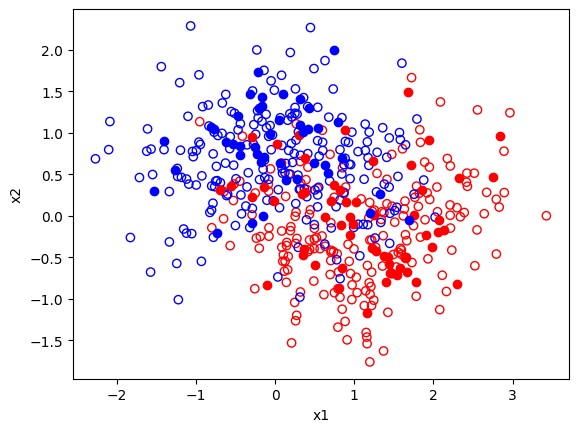

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], facecolor='none', edgecolor='r')
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], facecolor='none', edgecolor='b')

plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], facecolor='r', edgecolor='r')
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], facecolor='b', edgecolor='b')

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()



## 2. Regresor Logístico

Vamos a entrenar un regresor logístico sobre este conjunto de datos. Para ello, vamos a utilizar la implementación provista por la librería Scikit-Learn.

**Ejercicio:** Entrene un regresor logístico con los datos de entrenamiento (`penalty='none'`). Luego, grafique la frontera de decisión (utilice la función provista) y mida la exactitud sobre el conjunto de entrenamiento y de evaluación.

In [40]:
# creamos el modelo y lo entrenamos
model = LogisticRegression(penalty=None)      # Creamos el regresor logístico con penalty = 'none' o None

model.fit(X_train, y_train)                     # Entrenamos el modelo de entrenamiento
modeltest = model.fit(X_test, y_test)           # Entrenamos el modelo de testeo

y_pred_train = model.predict(X_train) #estoy haciendo las predicciones del modelo
y_pred_test = modeltest.predict(X_test)



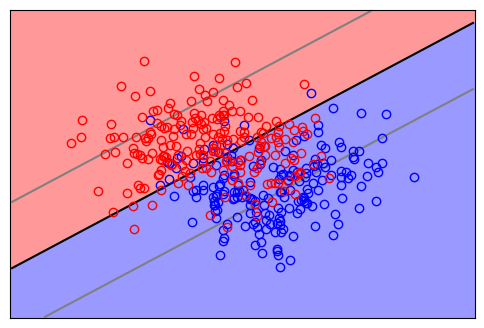

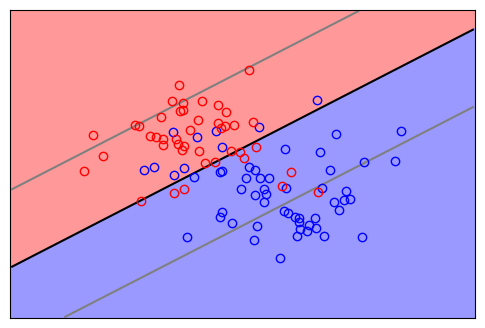

In [41]:
#graficamos la frontera 

plot_regions(model, X_train, y_train)          # grafico de entrenamiento
plot_regions(modeltest, X_test, y_test)           # grafico de testeo


In [42]:
#calculamos la exactitud
exactitud_train  = accuracy_score(y_train, y_pred_train)
exactitud_test  = accuracy_score(y_test, y_pred_test)

print(exactitud_train)              #exactitud del entrenamiento
print(exactitud_test)               #exactitud del testeo


0.7725
0.81


## 3. Regresor Logístico con atributos polinómicos 

**Ejercicio:** Entrene un regresor logístico polinómico de grado 3. Evalúe su exactitud sobre los conjuntos de entrenamiento y evaluación y grafique la frontera de decisión. Compare con el obtenido en el punto anterior.

Para ellos, proponemos que sigas los siguientes pasos:
- Arme un pipeline de sklearn usando como primer paso el preprocesador polinómico, luego un un `StandardScaler`, y por último el regresor logístico. (_Pista: `Pipeline` de `sklearn.pipeline` pueden servir_)
- Entrene este pipeline sobre el conjunto de entrenamiento, y páselo entrenado a la función de plotteo provista al comienzo del notebook.

In [43]:
lr_poly = Pipeline([                #armamos el pipeline
    ('poly', PolynomialFeatures(3) ),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty=None) )
])

model2 = lr_poly.fit(X_train, y_train)      #entrenamos el pipeline
y_pred_train2 = model2.predict(X_train) 
y_pred_test2 = model2.predict(X_test) 


In [44]:
# exactitud de entrtenamiento y testeo

exactitud_train2  = accuracy_score(y_train, y_pred_train2)
exactitud_test2  = accuracy_score(y_test, y_pred_test2)

print(exactitud_train2)              #exactitud del entrenamiento
print(exactitud_test2)               #exactitud del testeo

0.8275
0.78


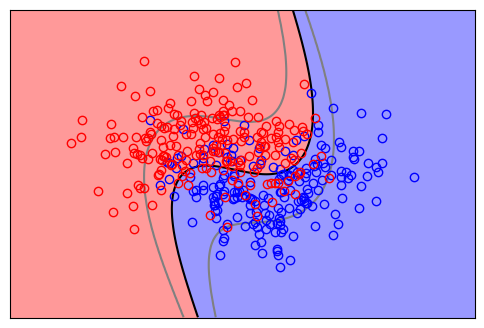

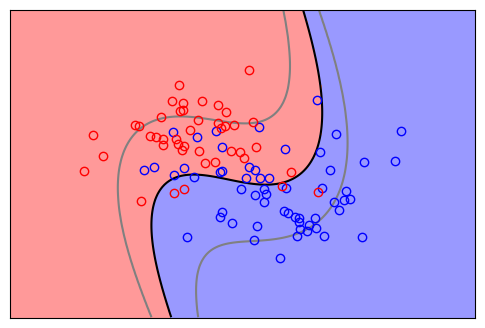

In [45]:
#graficamos la frontera 

plot_regions(model2, X_train, y_train)          # grafico de entrenamiento
plot_regions(model2, X_test, y_test)           # grafico de testeo

**Ejercicio:** repita el ejercicio anterior para varios valores del grado polinómico (entre 1 y 10). Grafique cómo cambian las fronteras de decisión, la exactitud sobre el conjunto de entrenamiento y de evaluación. ¿Que conclusiones extrae de esto?

-_Opcional_: Registre los valores de exactitud en ambos conjuntos (train y test), y grafíquelas en función del grado polinómico usado. ¿Qué observa?

Para M = 10, La Exactitud el Entrenamiento es 0.8275  y la Exactitud del Testeo es 0.78


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21300\2187241053.py:14: RuntimeWarning: overflow encountered in exp
  plt.contour(xx, yy, 1/(1 + np.exp(-Z)), [0.05, 0.5, 0.95], colors=['0.5', 'k', '0.5'], zorder=1)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21300\2187241053.py:14: RuntimeWarning: overflow encountered in exp
  plt.contour(xx, yy, 1/(1 + np.exp(-Z)), [0.05, 0.5, 0.95], 

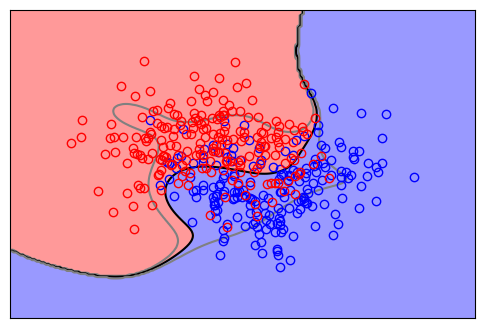

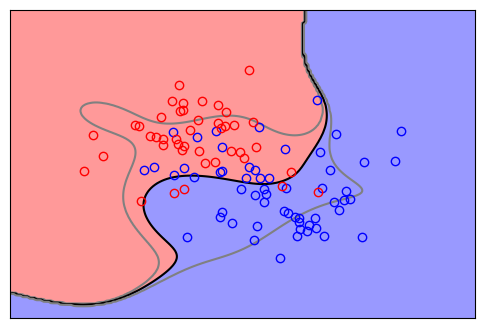

In [46]:
M = 10

lr_poly = Pipeline([                #armamos el pipeline
        ('poly', PolynomialFeatures(M) ),
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(penalty=None) )
    ])

    

model_new = lr_poly.fit(X_train, y_train)      #entrenamos el pipeline
y_pred_train_new = model_new.predict(X_train) 
y_pred_test_new = model_new.predict(X_test) 

#calculamos exactitud 
exactitud_train2  = accuracy_score(y_train, y_pred_train_new)
exactitud_test2  = accuracy_score(y_test, y_pred_test_new)

print(f'Para M = {M}, La Exactitud el Entrenamiento es {exactitud_train2}  y la Exactitud del Testeo es {exactitud_test2}')

#graficamos 
    
plot_regions(model_new, X_train, y_train)          # grafico de entrenamiento
plot_regions(model_new, X_test, y_test)           # grafico de testeo

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21300\2187241053.py:14: RuntimeWarning: overflow encountered in exp
  plt.contour(xx, yy, 1/(1 + np.exp(-Z)), [0.05, 0.5, 0.95], colors=['0.5', 'k', '0.5'], zorder=1)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:

[0.83, 0.8225, 0.8275, 0.83, 0.8275, 0.8275]
[0.82, 0.81, 0.78, 0.78, 0.78, 0.78]


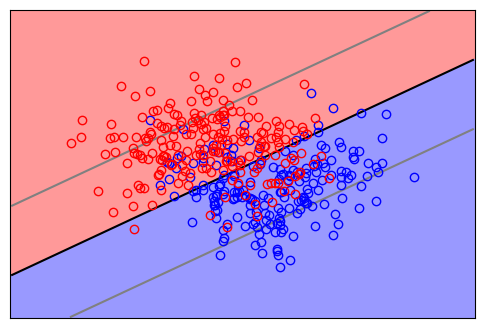

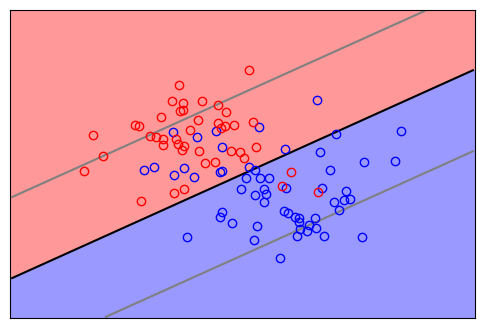

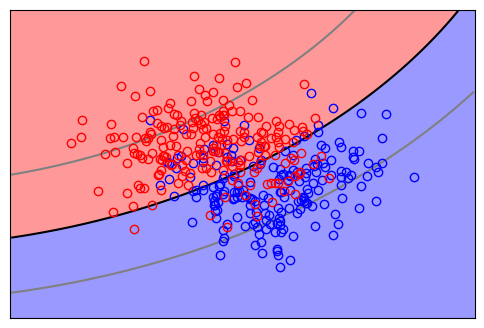

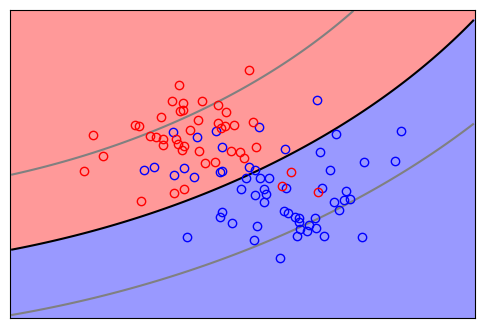

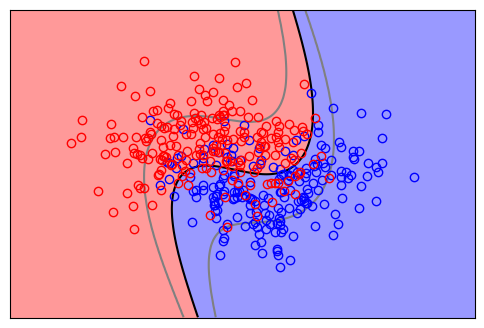

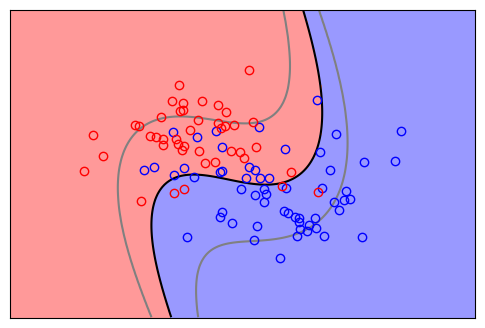

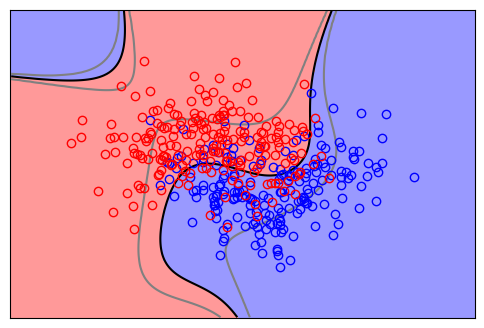

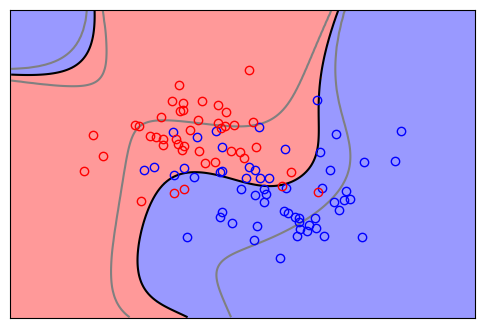

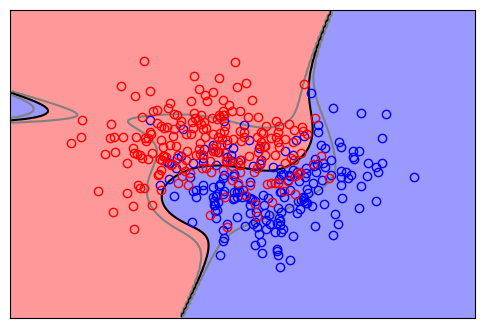

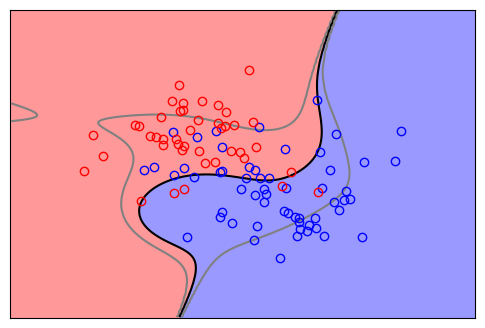

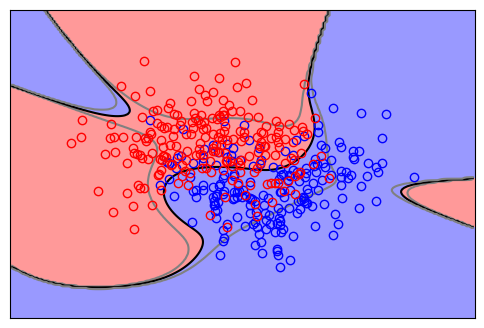

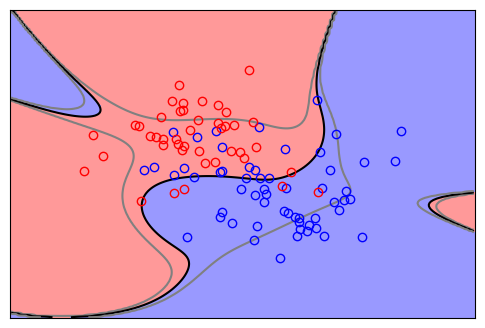

In [47]:
train_acc = []
test_acc = []
Ms = np.arange(1,7)


for M in Ms:
    lr_poly = Pipeline([                #armamos el pipeline
        ('poly', PolynomialFeatures(M) ),
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(penalty=None) )
    ])

    

    model_new = lr_poly.fit(X_train, y_train)      #entrenamos el pipeline
    y_pred_train_new = model_new.predict(X_train) 
    y_pred_test_new = model_new.predict(X_test) 

    #calculamos exactitud 

    test_acc.append(accuracy_score(y_test, y_pred_test_new))
    train_acc.append(accuracy_score(y_train, y_pred_train_new))

    #graficamos 
    
    plot_regions(model_new, X_train, y_train)          # grafico de entrenamiento
    plot_regions(model_new, X_test, y_test)           # grafico de testeo


print(train_acc)
print(test_acc)


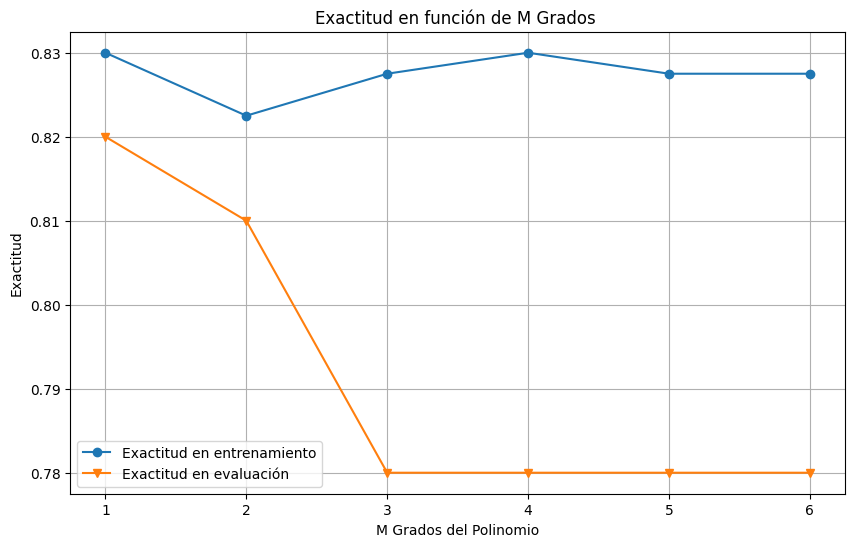

In [48]:
# graficar accuracy en funcion de M

plt.figure(figsize=(10, 6))                                                             # tamaño de la figura 10x6 pulgadas
plt.plot(Ms, train_acc, label='Exactitud en entrenamiento', marker='o')      # gráfico de los train_scores
plt.plot(Ms, test_acc, label='Exactitud en evaluación', marker='v')          # gráfico de los test_scores

plt.title('Exactitud en función de M Grados ')                   # título del gráfico
plt.xlabel('M Grados del Polinomio')                                              # etiqueta eje x 
plt.ylabel('Exactitud')                                                                 # etiqueta eje y
plt.xticks(Ms)                                                                  # lineas en el eje x para que coincidan con los valores marcados. 
plt.legend()                                                                            # se agrega leyenda por default
plt.grid(True)                                                                          # habilitamos la cuadrícula para que sea más facil de entender los datos
plt.show()

## 4. Regularización

Observamos como aumentando el grado del polinomio, obtenemos modelos mas flexibles que logran ajustar mejor los datos de entrenamiento. Sin embargo, esta mejora generaba fronteras de decisión más complejas que generalizaban peor, y la performance del conjunto de evaluación empeora. Este fenómeno es lo que se conoce como **sobreajuste**: es el punto en el que nuestro modelo comienza a ajustar no solo el _patrón_ de los datos de entrenamiento, sino también el _ruido_ aleatorio que hay en ellos, y deteriora el poder predictivo.

La forma de combatir este problema es disminuir la flexiblidad del modelo, lo que se conoce como **regularización**. En este notebook, introduciremos las técnicas más genéricas de regularización, L1, L2 y ElasticNet, generalmente aplicadas en Regresión Logística en el contexto de clasificación y en Regresión Lineal en el contexto de regresión.

**Ejercicio:**
- Elija un tipo de regularización (L1 o L2)
- Modifique el regresor logístico del `Pipeline` anterior para que acepte como parametros el argumento `C` y el `penalty` correspondiente a la regularización escogida.
- Entrene y compare las fronteras de decisión de los siguientes regresores logísticos polinómicos de grado 5:
    - Sin regularizar (`penalty='none'` o bien `C=1e16`)
    - Medianamente regularizado (`C~1`)
    - Altamente regularizado (`C ≤ 0.001`)
- Observe los parámetros obtenidos. ¿Qué observa? ¿Qué conclusiones puede sacar?
- Repita para el otro tipo de regularización. Compare y presta particular atención a los parámetros cuando usas regularización L1.


In [49]:
# Si vamos a usar Lasso, cambiamos en donde dice penalty = 'none' por penalty = 'l1'
# Si vamos a usar Ridge, cambiamos en donde dice penalty = 'none' por penalty = 'l2'  
# Si vamos a usar ElasticNet, cambiamos en donde dice penalty = 'none' por penalty = 'elasticnet' 

Usamos Lasso (penalty = 'l1')

In [50]:
# creo una función que entrene y evalue el modelo
def entrenar_y_evaluar_modelo(C, penalty, X_train, y_train, X_test, y_test, solver='liblinear'):            # Crea un pipeline con un modelo de regresión logística y los parámetros especificados
    
    lr_poly = Pipeline([
        ('poly', PolynomialFeatures(5)),
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(penalty=penalty, C=C, solver=solver))
    ])
    
    model_new = lr_poly.fit(X_train, y_train)           # Entrena el modelo
    
    y_pred_train_new = model_new.predict(X_train)       # Realiza predicciones
    y_pred_test_new = model_new.predict(X_test)
    
    exactitud_train = accuracy_score(y_train, y_pred_train_new)     # Calcula la exactitud
    exactitud_test = accuracy_score(y_test, y_pred_test_new)
    
    # Muestra las exactitudes de entrenamiento y prueba
    print(f'Para C = {C}, penalty = "{penalty}", la exactitud en entrenamiento es {exactitud_train} y la exactitud en test es {exactitud_test}')
    
    plot_regions(model_new, X_train, y_train)  # Gráfico de entrenamiento
    plot_regions(model_new, X_test, y_test)  # Gráfico de prueba
    
    return model_new


Sin regularización:
Para C = 1e+16, penalty = "l1", la exactitud en entrenamiento es 0.8275 y la exactitud en test es 0.78


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21300\2187241053.py:14: RuntimeWarning: overflow encountered in exp
  plt.contour(xx, yy, 1/(1 + np.exp(-Z)), [0.05, 0.5, 0.95], colors=['0.5', 'k', '0.5'], zorder=1)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21300\2187241053.py:14: RuntimeWarning: overflow encountered in exp
  plt.contour(xx, yy, 1/(1 + np.exp(-Z)), [0.05, 0.5, 0.95], colors=['0.5', 'k', '0.5'], zorder=1)


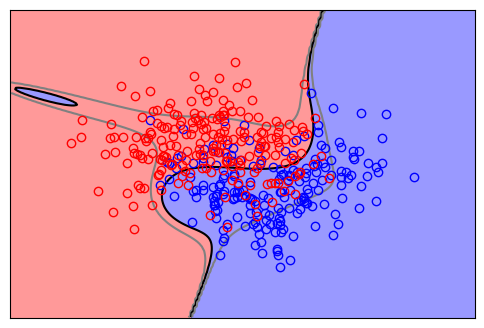

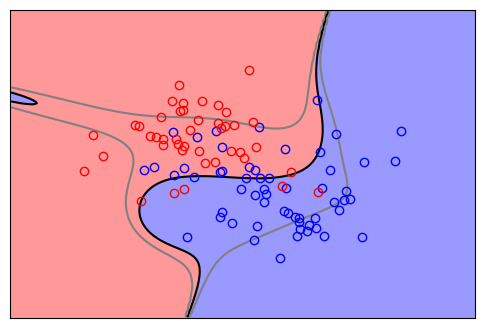

In [51]:
# Entrenar y evaluar modelo sin regularizar
C = 1e16

print("Sin regularización:")
modelo_sin_regularizar = entrenar_y_evaluar_modelo(C=C, penalty='l1', solver='liblinear', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)



Medianamente regularizado:
Para C = 1, penalty = "l1", la exactitud en entrenamiento es 0.845 y la exactitud en test es 0.77


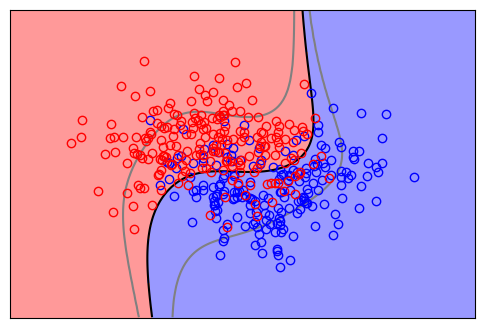

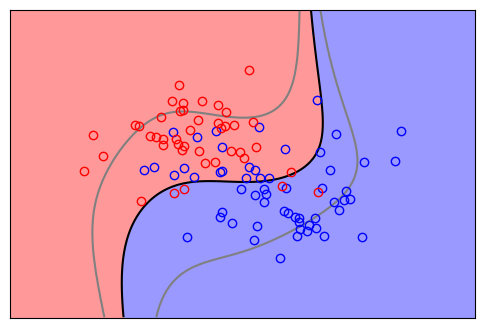

In [52]:
# Entrenar y evaluar modelo medianamente regularizado
C = 1

print("\nMedianamente regularizado:")
modelo_medianamente_regularizado = entrenar_y_evaluar_modelo(C=C, penalty='l1' , solver='liblinear', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)



Altamente regularizado:
Para C = 0.001, penalty = "l1", la exactitud en entrenamiento es 0.5175 y la exactitud en test es 0.43


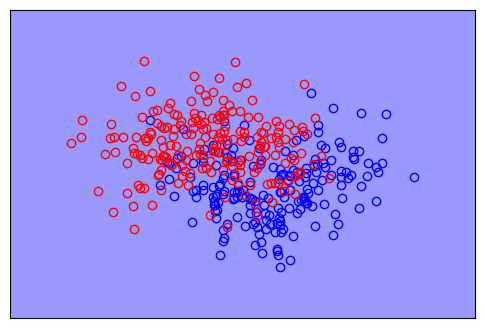

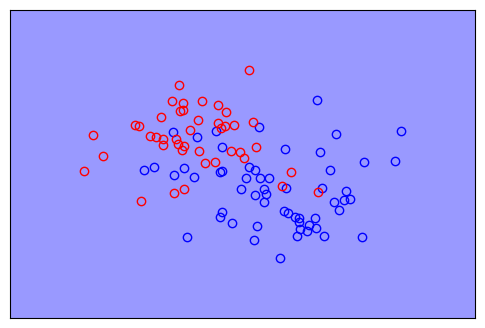

In [53]:
# Entrenar y evaluar modelo altamente regularizado
C = 0.001

print("\nAltamente regularizado:")
modelo_altamente_regularizado = entrenar_y_evaluar_modelo(C=C, penalty='l1', solver='liblinear', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Usamos Ridge (penalty = 'l2')

Sin regularización:
Para C = 1e+16, penalty = "l2", la exactitud en entrenamiento es 0.8275 y la exactitud en test es 0.8


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21300\2187241053.py:14: RuntimeWarning: overflow encountered in exp
  plt.contour(xx, yy, 1/(1 + np.exp(-Z)), [0.05, 0.5, 0.95], colors=['0.5', 'k', '0.5'], zorder=1)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21300\2187241053.py:14: RuntimeWarning: overflow encountered in exp
  plt.contour(xx, yy, 1/(1 + np.exp(-Z)), [0.05, 0.5, 0.95], colors=['0.5', 'k', '0.5'], zorder=1)


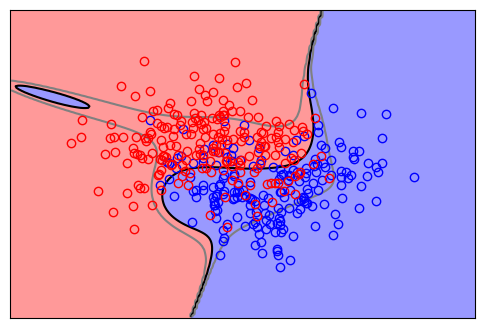

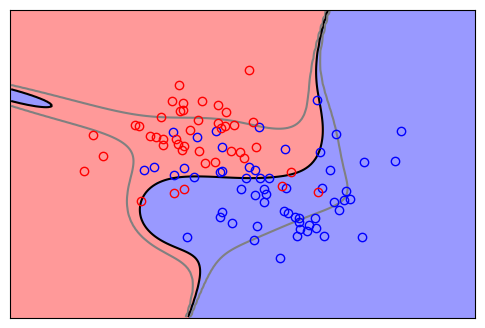

In [54]:
# Entrenar y evaluar modelo sin regularizar
C = 1e16

print("Sin regularización:")
modelo_sin_regularizar = entrenar_y_evaluar_modelo(C=C, penalty='l2', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


Medianamente regularizado:
Para C = 1, penalty = "l2", la exactitud en entrenamiento es 0.8425 y la exactitud en test es 0.79


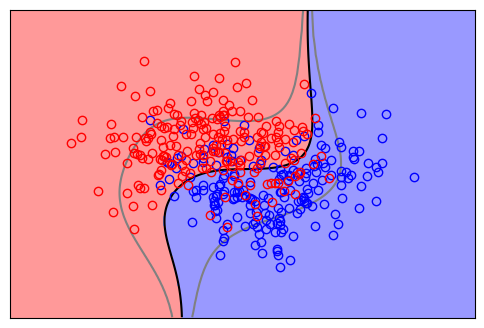

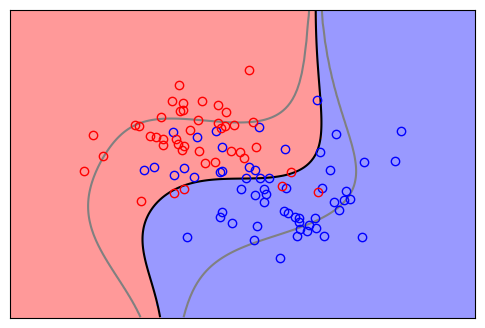

In [55]:
# Entrenar y evaluar modelo medianamente regularizado
C = 1

print("\nMedianamente regularizado:")
modelo_medianamente_regularizado = entrenar_y_evaluar_modelo(C=C, penalty='l2', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


Altamente regularizado:
Para C = 0.001, penalty = "l2", la exactitud en entrenamiento es 0.8 y la exactitud en test es 0.8


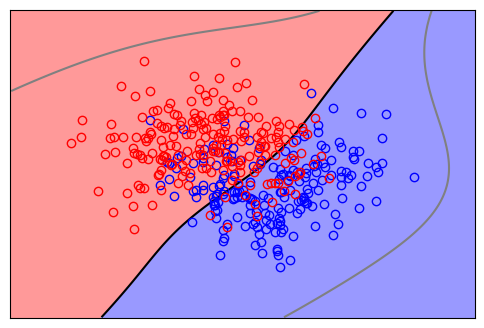

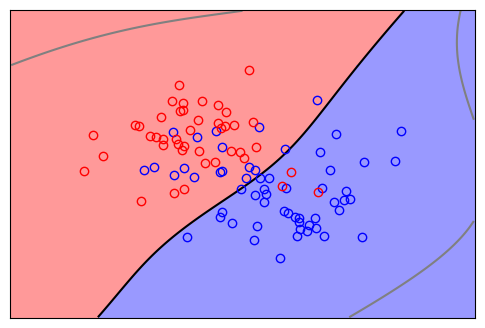

In [56]:
# Entrenar y evaluar modelo altamente regularizado
C = 0.001

print("\nAltamente regularizado:")
modelo_altamente_regularizado = entrenar_y_evaluar_modelo(C=C, penalty='l2', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Usamos ElascticNet (penalty = 'elasticnet')

In [73]:
def entrenar_y_evaluar_modelo2(C, penalty, X_train, y_train, X_test, y_test, solver='saga', l1_ratio=0.5):            
    lr_poly = Pipeline([
        ('poly', PolynomialFeatures(5)),
        ('scaler', StandardScaler()),
        ('elasticnet', LogisticRegression(penalty=penalty, C=C, solver=solver, l1_ratio=l1_ratio))
    ])
    
    model_new = lr_poly.fit(X_train, y_train)           
    y_pred_train_new = model_new.predict(X_train)       
    y_pred_test_new = model_new.predict(X_test)
    
    exactitud_train = accuracy_score(y_train, y_pred_train_new)     
    exactitud_test = accuracy_score(y_test, y_pred_test_new)
    
    print(f'Para C = {C}, penalty = "{penalty}", la exactitud en entrenamiento es {exactitud_train} y la exactitud en test es {exactitud_test}')

In [74]:
cs = [1e16, 1, 0.001]
for c in cs:
    modelo = entrenar_y_evaluar_modelo2(C=c, penalty='elasticnet', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

**Ejercicio:** 
Elije algún problema de regresión lineal en el que haya trabajado en la clase anterior (puede ser en el dataset sintético o con el dataset de Housing). Repite el ejercicio, pero ahora en vez de utilizar la clase `sklearn.linear_model.LinearRegression`, utilice alguna(s) de las siguientes:
- `sklearn.linear_model.Ridge`: Regresión lineal que implementa la regularización L2
- `sklearn.linear_model.Lasso`: Regresión lineal que implementa la regularización L1
- `sklearn.linear_model.ElasticNet`: Regresión lineal que implementa la regularización ElasticNet (una combinación lineal de L1 y L2)

No olvides los atributos polinómicos ni de incorporar un `StandardScaler` al pipeline.

In [61]:
def plot_3d_scatter(x1, x2, y, ax=None, fig = None):            # definimos una función para graficas 3D
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('Valores x1')         # leyenda ejes
    ax.set_ylabel('Valores x2')
    ax.set_zlabel('Prediccion y')

In [62]:

def plot_3d_regressor(x1_min, x1_max, x2_min,x2_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N)
    x2 = np.linspace(x2_min,x2_max,N)
    X1, X2 = np.meshgrid(x1,x2)

    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)

    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.5)

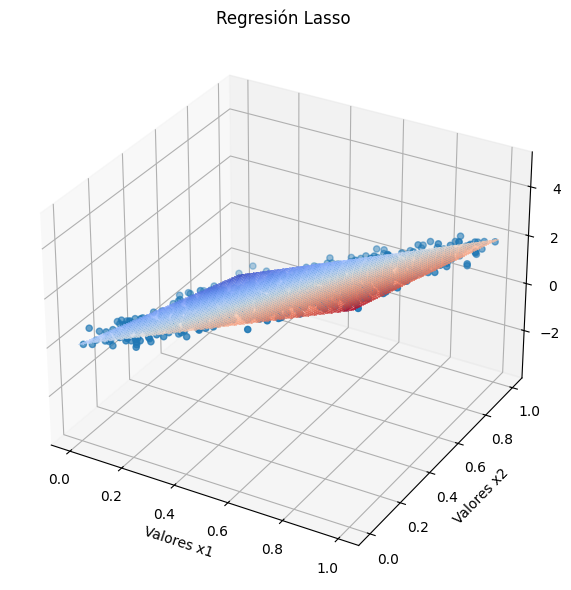

In [63]:
# Crear los datos
n = 1000
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = 5 * x1 - 3 * x2 + 0.25 * np.random.randn(n)

# Crear los atributos y dividir en conjunto de entrenamiento y prueba
X = np.vstack((x1, x2)).T
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un Pipeline con PolynomialFeatures, StandardScaler y Lasso
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Ajustar el grado según sea necesario
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.1))  # Ajustar alpha según la cantidad de regularización deseada
])

# Entrenar el Pipeline
pipe.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipe.predict(X_train)

# Obtener coeficientes e intercepto del modelo
coeficientes = pipe.named_steps['lasso'].coef_
intercepto = pipe.named_steps['lasso'].intercept_

# Visualizar los resultados en 3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
plt.title('Regresión Lasso')
plot_3d_regressor(0, 1, 0, 1, 100, pipe, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)
plt.tight_layout()
plt.show()


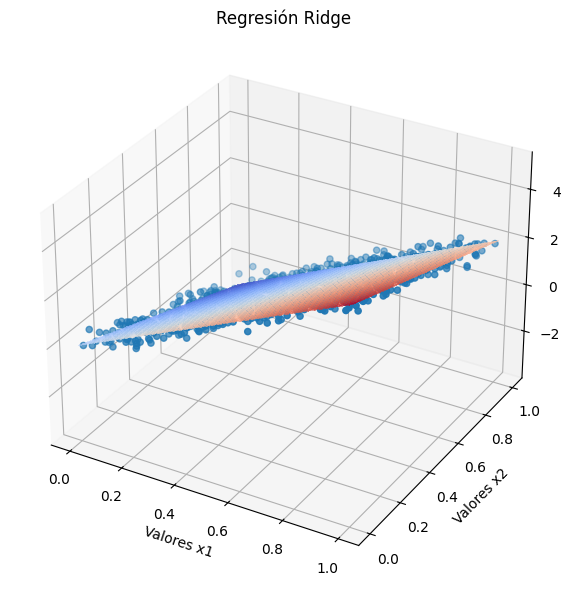

In [64]:
from sklearn.linear_model import Ridge

pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Ajustar el grado según sea necesario
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=0.1))  # Ajustar alpha según la cantidad de regularización deseada
])

# Entrenar el Pipeline
pipe.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipe.predict(X_train)

# Obtener coeficientes e intercepto del modelo
coeficientes = pipe.named_steps['ridge'].coef_
intercepto = pipe.named_steps['ridge'].intercept_

# Visualizar los resultados en 3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
plt.title('Regresión Ridge')
plot_3d_regressor(0, 1, 0, 1, 100, pipe, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)
plt.tight_layout()
plt.show()

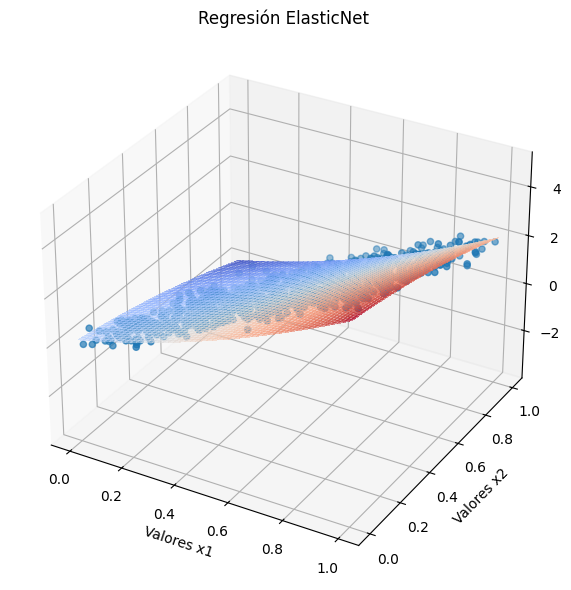

In [75]:
from sklearn.linear_model import ElasticNet


pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Ajustar el grado según sea necesario
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(alpha=0.3))  # Ajustar alpha según la cantidad de regularización deseada
])

# Entrenar el Pipeline
pipe.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipe.predict(X_train)

# Obtener coeficientes e intercepto del modelo
coeficientes = pipe.named_steps['elasticnet'].coef_
intercepto = pipe.named_steps['elasticnet'].intercept_

# Visualizar los resultados en 3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
plt.title('Regresión ElasticNet')
plot_3d_regressor(0, 1, 0, 1, 100, pipe, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)
plt.tight_layout()
plt.show()